Importing necessary packages

In [68]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Data Inspection/Cleaning

In [69]:
df = pd.read_csv('../ALS 2017-2022 Donor Data.csv')

In [70]:
df.head()

,Donation ID,Donor ID,Received Date,Donation Amount,Campaign Id,Fund Description,Fund Name,Payment Type,First Gift Date,Last Gift Date,Gender,Age,Postal Code,City,Total Number of Donation,Total Amount of Donation,Retained
0,167648,1735748,2017-01-01,50.0,4053,Events:Walks,Events:Walks,Credit Card,2017-01-01,2017-01-01,Unknown or N/A,NaN,77494.0,Katy,3,130.0,1
1,168284,1736258,2017-01-01,500.0,7193,Unrestricted Giving:Memorials,Memorials,Other,2017-01-01,2017-01-01,Unknown or N/A,NaN,77493.0,Katy,1,500.0,0
2,168285,1736259,2017-01-01,1000.0,42,Individual Donor,Individual Donor,Other,2017-01-01,2017-01-01,Unknown or N/A,NaN,77018.0,Houston,1,1000.0,0
3,168286,1736260,2017-01-01,250.0,7193,Unrestricted Giving:Memorials,Memorials,Other,2017-01-01,2017-01-01,Unknown or N/A,NaN,77024.0,Houston,1,250.0,0
4,168343,1689213,2017-01-01,100.0,352,Individual Donor,Individual Donor,Other,2017-01-01,2017-01-01,Unknown or N/A,NaN,75048.0,Sachse,2,200.0,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57716 entries, 0 to 57715
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Donation ID               57716 non-null  int64  
 1   Donor ID                  57716 non-null  int64  
 2   Received Date             57716 non-null  object 
 3   Donation Amount           57716 non-null  float64
 4   Campaign Id               57716 non-null  int64  
 5   Fund Description          57706 non-null  object 
 6   Fund Name                 57706 non-null  object 
 7   Payment Type              57706 non-null  object 
 8   First Gift Date           57716 non-null  object 
 9   Last Gift Date            57716 non-null  object 
 10  Gender                    57227 non-null  object 
 11  Age                       807 non-null    float64
 12  Postal Code               45230 non-null  float64
 13  City                      45409 non-null  object 
 14  Total 

In [72]:
df.describe()

,Donation ID,Donor ID,Donation Amount,Campaign Id,Age,Postal Code,Total Number of Donation,Total Amount of Donation,Retained
count,57716.000000,5.771600e+04,5.771600e+04,57716.000000,807.000000,4.523000e+04,57716.000000,5.771600e+04,57716.000000
mean,218706.930331,1.753289e+06,2.264441e+02,6727.487716,59.706320,1.055690e+05,1.798808,5.961544e+02,0.385231
std,25417.369162,4.124397e+04,4.865913e+03,2308.139032,16.340036,1.603530e+06,1.273074,1.188119e+04,0.486654
min,164737.000000,1.600018e+06,0.000000e+00,0.000000,4.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,198120.750000,1.744834e+06,3.500000e+01,6106.000000,48.000000,7.516000e+04,1.000000,5.000000e+01,0.000000
50%,219596.500000,1.762728e+06,5.169000e+01,7042.000000,61.000000,7.709200e+04,1.000000,1.000000e+02,0.000000
75%,241405.250000,1.780089e+06,1.000000e+02,8202.000000,73.000000,7.825300e+04,2.000000,2.500000e+02,1.000000
max,261421.000000,1.803649e+06,1.083782e+06,9804.000000,100.000000,9.770000e+07,6.000000,1.105289e+06,1.000000


In [73]:
df['Fund Description'].unique()

array(['Events:Walks', 'Unrestricted Giving:Memorials',
       'Individual Donor', 'Events:Chapter Events (Non-Walk)',
       'Unrestricted Giving:Federated Donations',
       'Unrestricted Giving:Matching Gifts', 'Association Direct Mail',
       'Events:Sponsorship', 'AI - Comm Third Party',
       'Restricted Giving:Unsolicited restricted',
       'Unrestricted Giving:Direct Mail',
       'Unrestricted Giving:In-Kind Donation',
       'Unrestricted Giving:Corporate Donors',
       'Restricted Giving:Research', 'AI - ADMHM', 'Uncategorized',
       'Restricted: Solicited', 'Restricted Giving:Grants',
       'general merchandise sales', 'Community of Hope', 'Bequest',
       'Reimbursment', 'Major Gifts', 'Unsolicited: Restricted',
       'Unrestricted Giving:In-Kind Revenue', 'Federated Donation',
       'Unrestricted Giving:Individual Donor', 'Unrestricted Giving:DIY',
       'Restricted Giving:Solicited Restricted', nan], dtype=object)

Convert Donation Amount Data to Integers

In [74]:
# df['Donation Amount']=df['Donation Amount'].str.replace(',','')
df['Donation Amount'] = pd.to_numeric(df['Donation Amount'])

In [75]:
df['Donation Amount'] = df['Donation Amount'].round()
df['Donation Amount'].astype(int)

0          50
1         500
2        1000
3         250
4         100
         ... 
57711     515
57712     100
57713     103
57714    1250
57715     250
Name: Donation Amount, Length: 57716, dtype: int64

Analysis of Total Donation Amount

In [87]:
df['Total Amount of Donation'].describe()

count    5.771600e+04
mean     5.961544e+02
std      1.188119e+04
min      0.000000e+00
25%      5.000000e+01
50%      1.000000e+02
75%      2.500000e+02
max      1.105289e+06
Name: Total Amount of Donation, dtype: float64

Summary Statistics by Fund Description

In [76]:
summary = df.groupby('Fund Description').agg({'Donation Amount':['sum', 'min', 'median', 'max', 'mean', 'median', 'count']})
summary = pd.DataFrame(summary)
# summary = summary.reset_index(level='Donation Amount')
summary.index.names

FrozenList(['Fund Description'])

In [77]:
summ = pd.DataFrame()
summ['Sum'] = df.groupby('Fund Description')['Donation Amount'].sum()
summ['Min'] = df.groupby('Fund Description')['Donation Amount'].min()
summ['Median'] = df.groupby('Fund Description')['Donation Amount'].median()
summ['Max'] = df.groupby('Fund Description')['Donation Amount'].max()
summ['Mean'] = df.groupby('Fund Description')['Donation Amount'].mean()
summ['Count'] = df.groupby('Fund Description')['Donation Amount'].count()
summ.sort_values(by=['Sum'], ascending= False)

,Sum,Min,Median,Max,Mean,Count
Fund Description,,,,,,
Events:Walks,5410820.0,1.0,50.0,50000.0,124.673272,43400
Events:Sponsorship,1256504.0,25.0,2500.0,50000.0,3272.145833,384
Bequest,1201456.0,57000.0,60674.0,1083782.0,400485.333333,3
Events:Chapter Events (Non-Walk),901038.0,0.0,100.0,25000.0,420.064336,2145
Unrestricted Giving:Memorials,672182.0,4.0,100.0,12000.0,148.220948,4535
Major Gifts,603567.0,5000.0,23750.0,250000.0,50297.250000,12
Individual Donor,584293.0,0.0,100.0,15000.0,272.524720,2144
AI - Comm Third Party,515136.0,0.0,87.0,30042.0,468.305455,1100
Restricted Giving:Grants,370866.0,300.0,10000.0,55000.0,13735.777778,27


<Axes: title={'center': 'Counts of each type of Event'}>

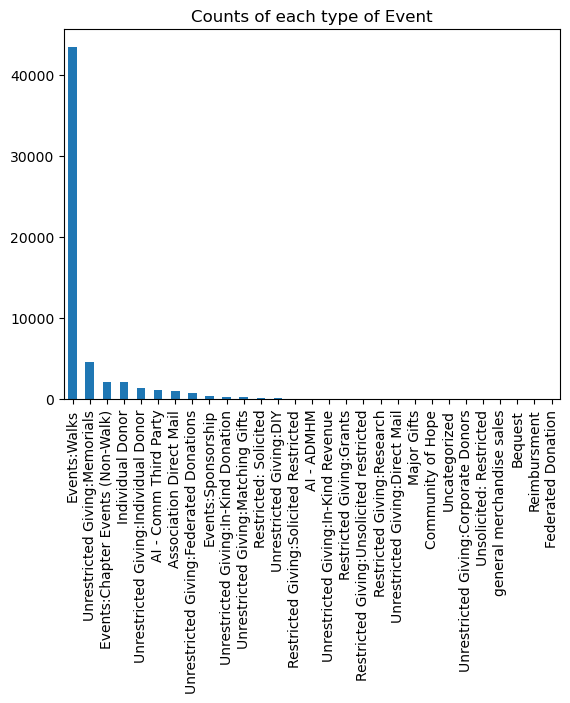

In [85]:
fig, ax = plt.subplots()
df['Fund Description'].value_counts().plot(ax=ax, kind='bar', title='Counts of each type of Event')

Text(0.5, 1.0, 'Average Donation Amount of Each Fund Description')

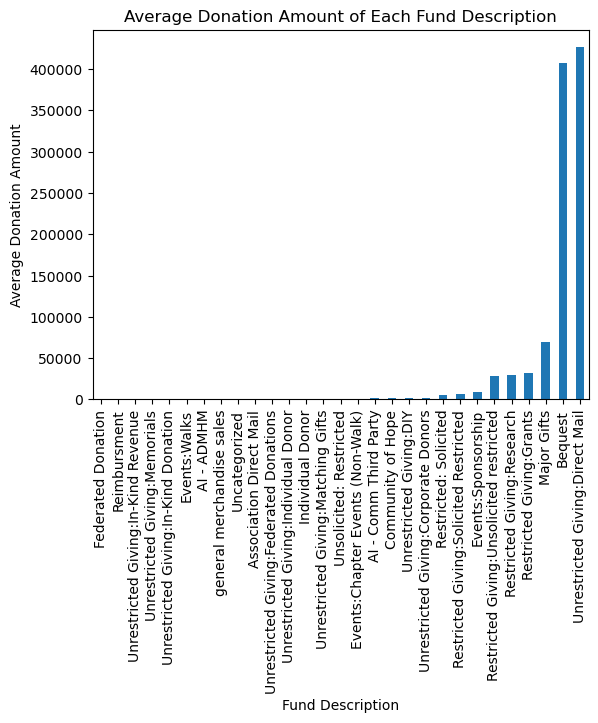

In [89]:
avgdono = df.groupby('Fund Description')['Total Amount of Donation'].mean().sort_values()
ax = avgdono.plot.bar()
ax.set_ylabel("Average Donation Amount")
ax.set_title("Average Donation Amount of Each Fund Description")

Text(0.5, 1.0, 'Average Donation Amount of Each Campaign Strategy (With Averages less than 2000)')

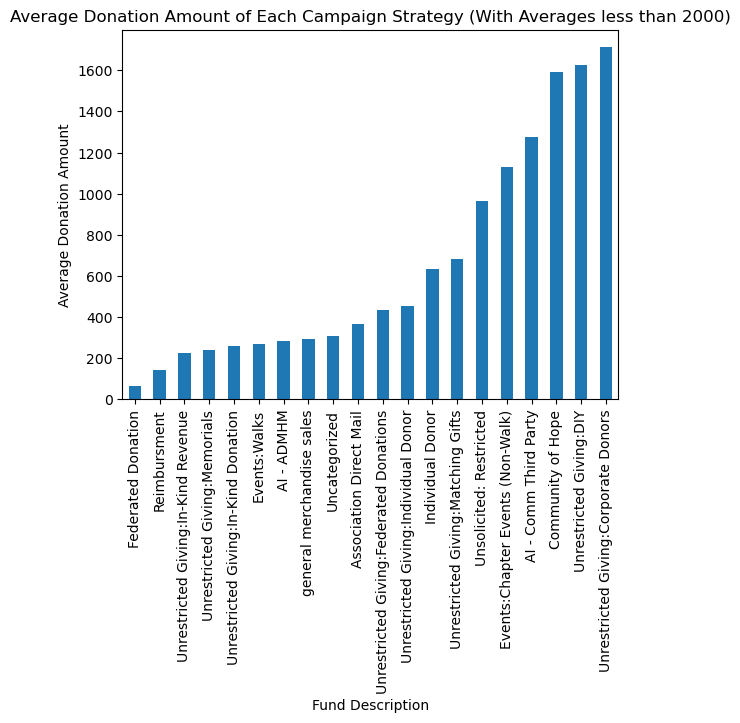

In [90]:
avgdono2 = avgdono[avgdono <= 2000]
ax = avgdono2.plot.bar()
ax.set_ylabel("Average Donation Amount")
ax.set_title("Average Donation Amount of Each Campaign Strategy (With Averages less than 2000)")

Text(0.5, 1.0, 'Total Donation Amount of Each Campaign Strategy')

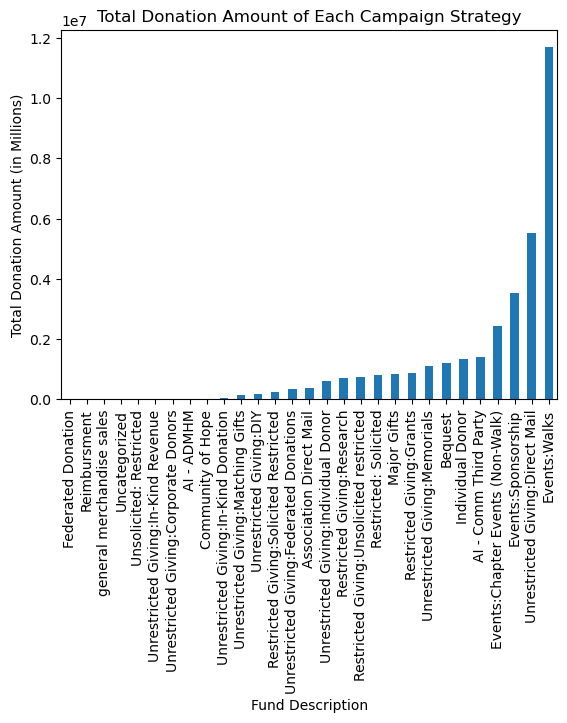

In [94]:
totaldono = df.groupby('Fund Description')['Total Amount of Donation'].sum().sort_values()
ax = totaldono.plot.bar()
ax.set_ylabel("Total Donation Amount (in Millions)")
ax.set_title("Total Donation Amount of Each Campaign Strategy")

Converting Date Columns to DateTypes

In [78]:
df["First Gift Date"] = pd.to_datetime(df["First Gift Date"])

Visualizations by Fund Description

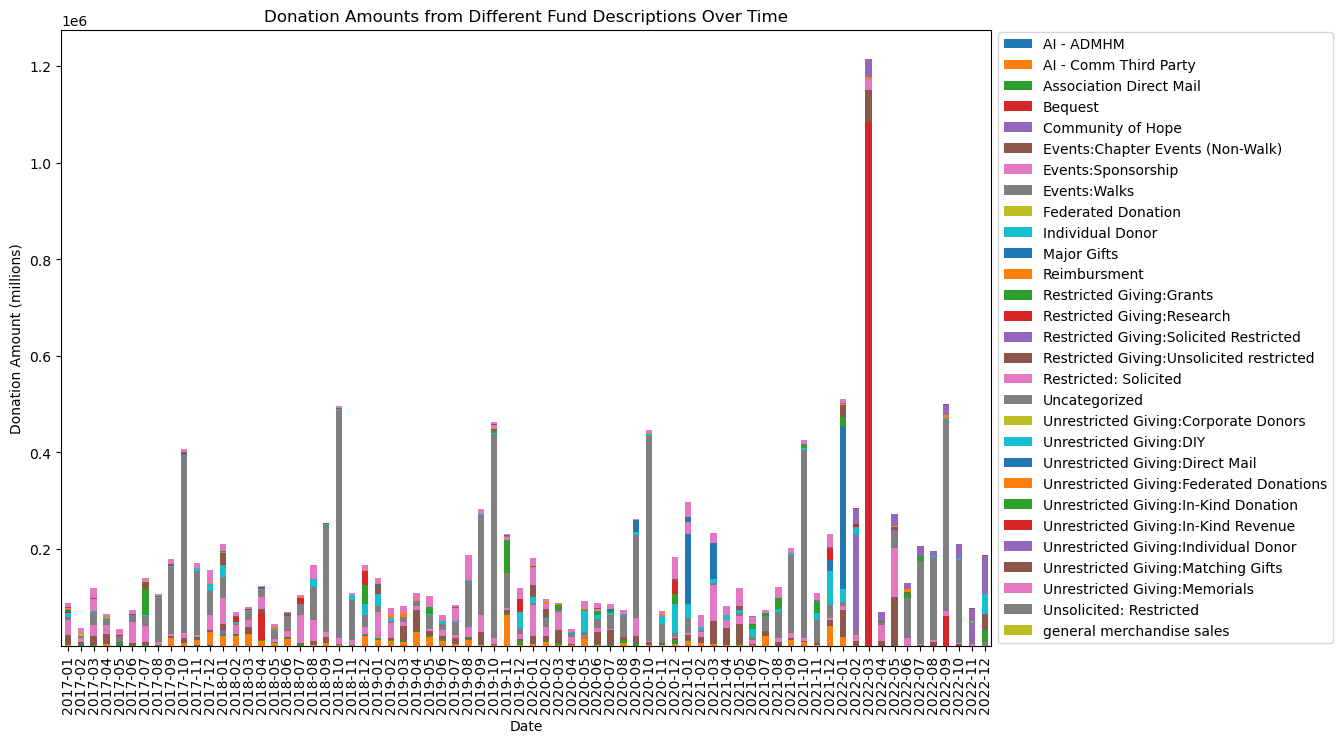

In [79]:
df['Month-Year'] = df['First Gift Date'].dt.to_period('M')
grouped_df = df.groupby(['Month-Year', 'Fund Description'])['Donation Amount'].sum().reset_index()
pivoted_df = grouped_df.pivot(index='Month-Year', columns='Fund Description', values='Donation Amount')

ax = pivoted_df.plot(kind='bar', stacked=True, figsize=(12,8))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Donation Amounts from Different Fund Descriptions Over Time')
plt.xlabel('Date')
plt.ylabel('Donation Amount (millions)')

plt.show()

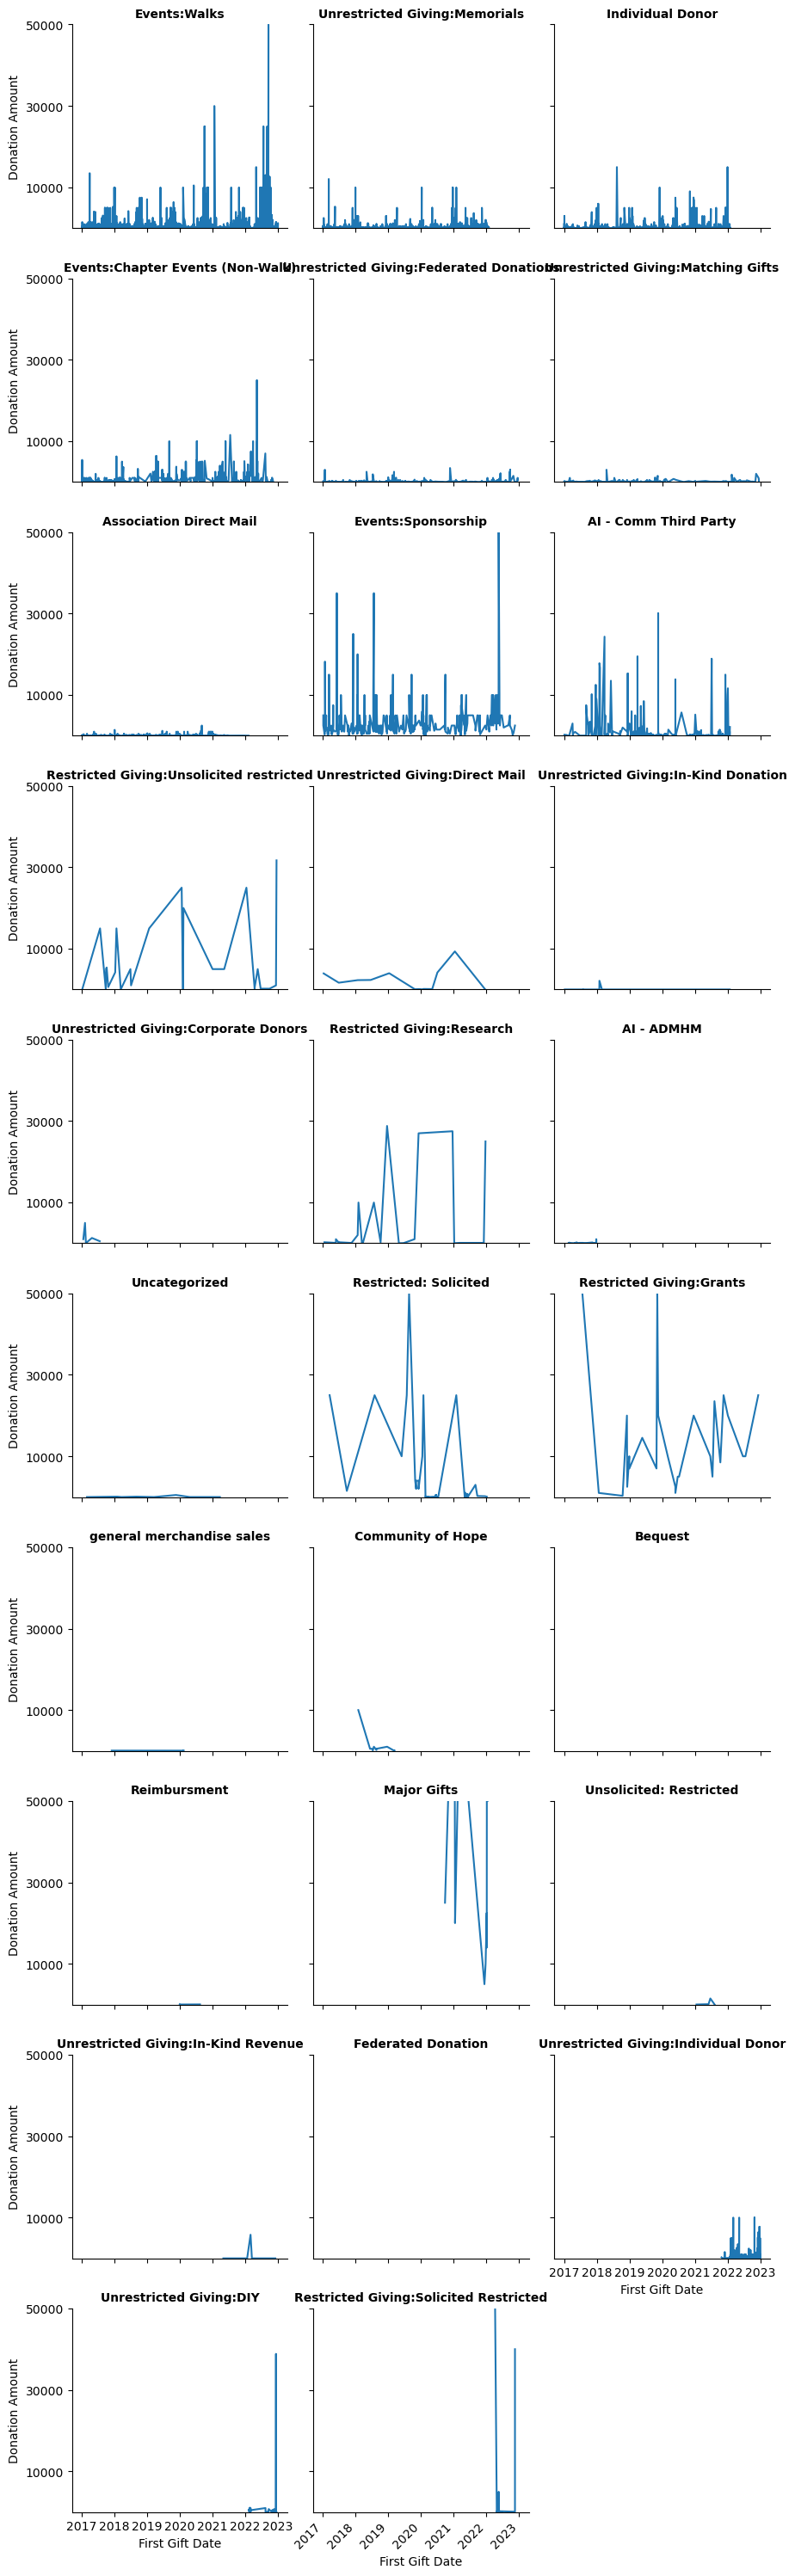

In [80]:
g = sns.FacetGrid(df, col='Fund Description', col_wrap=3)
g.map(plt.plot, 'First Gift Date', 'Donation Amount')
g.set(ylim=(0, 50000), yticks=[10000, 30000, 50000])
g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

Geographical Analysis

https://simplemaps.com/data/us-zips

In [97]:
zipCodes = pd.read_csv('../uszips.csv')

In [98]:
zipCodes

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,17126.0,102.6,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37895.0,482.5,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,49136.0,552.4,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5751.0,50.1,72093,Maricao,"{""72093"": 82.26, ""72153"": 11.68, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26153.0,272.1,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,99923,55.98043,-130.03803,Hyder,AK,Alaska,True,NaN,13.0,0.3,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33784,99925,55.55398,-132.96276,Klawock,AK,Alaska,True,NaN,917.0,6.6,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33785,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1445.0,4.2,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33786,99927,56.33305,-133.60044,Point Baker,AK,Alaska,True,NaN,11.0,0.9,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka


In [99]:
zipcode_donos = df.groupby(['Postal Code'])["Donation Amount"].agg(["sum"]).sort_values(by = 'sum', ascending = False)

In [100]:
zipcode_donos = zipcode_donos.merge(zipCodes, 'inner', left_on = 'Postal Code', right_on = 'zip')

In [101]:
zipcode_donos.dropna(subset = 'zip')

,sum,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,1105451.0,20005,38.90443,-77.03160,Washington,DC,District of Columbia,True,NaN,13444.0,11974.2,11001,District of Columbia,"{""11001"": 100}",District of Columbia,11001,False,False,America/New_York
1,341640.0,77024,29.77073,-95.50869,Houston,TX,Texas,True,NaN,37694.0,1122.0,48201,Harris,"{""48201"": 100}",Harris,48201,False,False,America/Chicago
2,208175.0,77056,29.74849,-95.46806,Houston,TX,Texas,True,NaN,22062.0,2464.2,48201,Harris,"{""48201"": 100}",Harris,48201,False,False,America/Chicago
3,178206.0,77546,29.51320,-95.19352,Friendswood,TX,Texas,True,NaN,54405.0,772.6,48167,Galveston,"{""48167"": 66.97, ""48201"": 31.11, ""48039"": 1.92}",Galveston|Harris|Brazoria,48167|48201|48039,False,False,America/Chicago
4,171845.0,77098,29.73482,-95.41526,Houston,TX,Texas,True,NaN,15414.0,3376.2,48201,Harris,"{""48201"": 100}",Harris,48201,False,False,America/Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,0.0,40701,36.91759,-84.16651,Corbin,KY,Kentucky,True,NaN,30020.0,77.0,21235,Whitley,"{""21235"": 60.96, ""21125"": 21.47, ""21121"": 17.57}",Whitley|Laurel|Knox,21235|21125|21121,False,False,America/New_York
5149,0.0,52043,42.84403,-91.42201,Elkader,IA,Iowa,True,NaN,1780.0,7.1,19043,Clayton,"{""19043"": 100}",Clayton,19043,False,False,America/Chicago
5150,0.0,79229,33.67379,-100.74400,Dickens,TX,Texas,True,NaN,281.0,0.5,48125,Dickens,"{""48125"": 100}",Dickens,48125,False,False,America/Chicago
5151,0.0,71483,31.89482,-92.66373,Winnfield,LA,Louisiana,True,NaN,9860.0,10.5,22127,Winn,"{""22127"": 100}",Winn,22127,False,False,America/Chicago


In [102]:
import folium
from folium.plugins import HeatMap

# Create a map centered at a specific latitude and longitude
map = folium.Map(location=[31.9686, -99.9018], zoom_start=5)

# Create a HeatMap layer using the latitudes, longitudes, and sums
heat_data = [[row['lat'],row['lng'], row['sum']] for index, row in zipcode_donos.iterrows()]
HeatMap(heat_data).add_to(map)

# Display the map
map

Miscellaneous Heat Maps

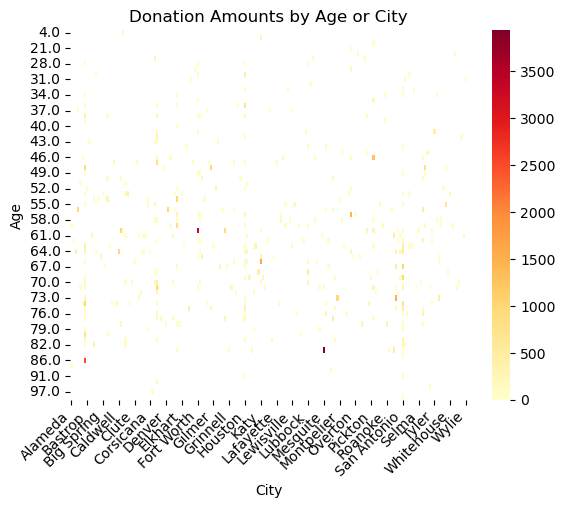

In [82]:
donations_by_location = df.pivot_table(values='Donation Amount', index='Age', columns='City')

sns.heatmap(donations_by_location, cmap='YlOrRd')

plt.title('Donation Amounts by Age or City')
plt.xticks(rotation=45, ha='right')

plt.show()

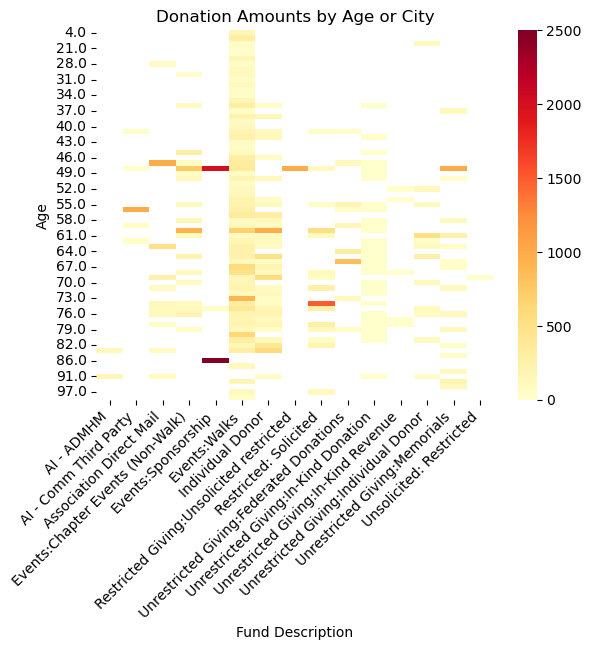

In [83]:
donations_by_location = df.pivot_table(values='Donation Amount', index='Age', columns='Fund Description')

sns.heatmap(donations_by_location, cmap='YlOrRd')

plt.title('Donation Amounts by Age or City')
plt.xticks(rotation=45, ha='right')

plt.show()

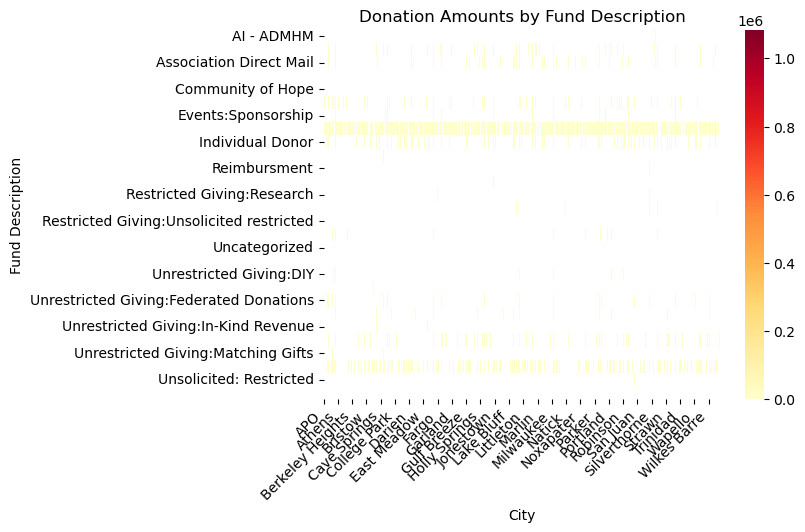

In [84]:
donations_by_location = df.pivot_table(values='Donation Amount', index='Fund Description', columns='City')

sns.heatmap(donations_by_location, cmap='YlOrRd')

plt.title('Donation Amounts by Fund Description')
plt.xticks(rotation=45, ha='right')

plt.show()